In [8]:
# import libraries
import altair as alt
import pandas as pd
import numpy as np

In [9]:
# it just needs to be here so we can work with big files 
alt.data_transformers.enable('default', max_rows=None)
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [11]:
# Upploading data
df = pd.read_csv('https://github.com/trokhymovych/data-viz-UCU2019/raw/master/HW1/population_prospects.csv')

# separate (as we could not do line dash encoding)
df1 = df[df.type=='estimate']
df2 = df[df.type!='estimate']

# creating df for annotations
text_df = df[df.year==2100]
text_df = text_df[text_df.type!='estimate']
text_df.loc[151,'population'] = text_df.loc[151,'population']+1000 # a little cheating for 

text_df1 = text_df.loc[[232, 151, 313]]
text_df2 = text_df[~text_df.index.isin([232, 151, 313])]

In [16]:
# configurations
Blue = '#3288bd'
Red = '#d53e4f'
Gray = '#5D646F'
Grid = '#5D646F'
background = '#F3F7F7'
font = 'Ubuntu Mono'

# selecting colors for lines
domain = list(df.type.unique())
range_ = [Red for i in range(len(domain))]
range2_ = ['transparent' for i in range(len(domain))]
range_[0] = Blue
range2_[0] = Blue
# customizing main Axes 
axisX = alt.Axis(gridDash = [1, 0, 1], 
                 values = [1950,1991,2020,2100],
                 grid=True, 
                 domain=False, 
                 tickDash=[1, 0, 1],
                 tickColor = 'lightgray',
                 labelAngle =0,
                 labelColor = Gray,
                 labelFont = font,
                 labelFontSize = 13,
                 labelPadding = 15,
                 )
axisY = alt.Axis(values=[i for i in range(15,55,5)],
                 gridDash = [1, 0, 1], grid=True,  
                 domain=False, 
                 ticks=False,
                 labelAngle =0,
                 labelColor = Gray,
                 labelFontSize = 13,
                 labelFont = font,
                 labelPadding = 7,
                 titleFontSize = 18,
                 titleFontWeight = 'lighter',
                 titleColor = Gray,
                 titlePadding = 10,
                 titleFont = font,
                 titleAngle = 0,
                 titleY =  -10,
                 titleX = 90)
# axes for text
ax2 = alt.Axis(grid=False, domain=False, ticks=False, labelColor="transparent") 

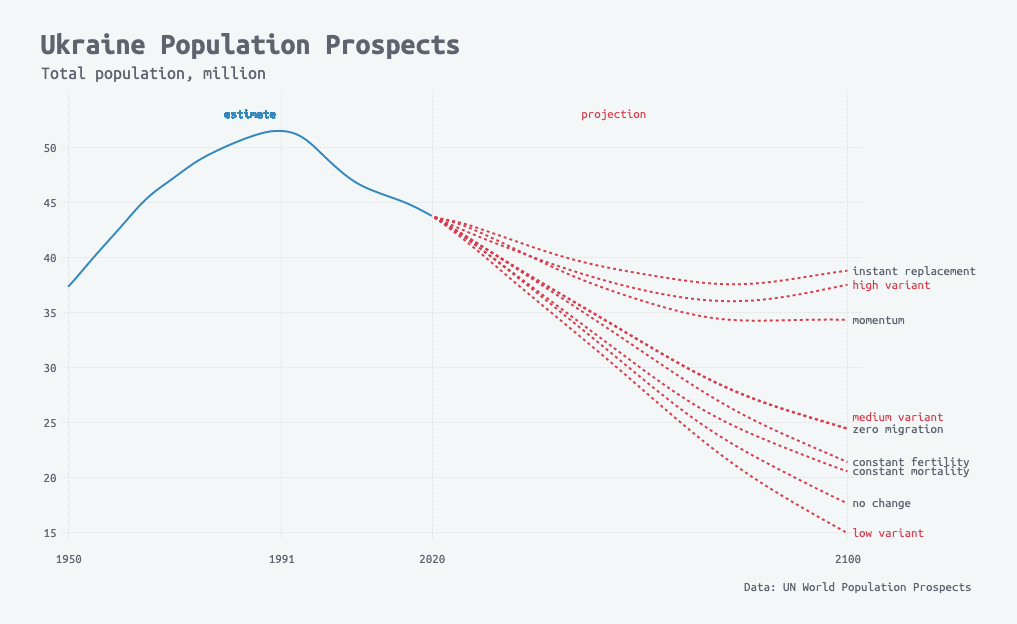

In [22]:
# line plots
main1 = alt.Chart(df1, title = 'Ukraine Population Prospects').mark_line().encode(
    x = alt.X('year:N', title='', axis = axisX, scale=alt.Scale(zero=False, padding = 40)),
    y = alt.Y('population_:Q', title='Total population, million', axis = axisY, scale=alt.Scale(zero=False, padding = 0, domain = (15,55))),
    color = alt.Color('type:N', legend=None,
                      scale=alt.Scale(domain=domain, range=range_)),
).transform_calculate(
    population_='datum.population/1000'
).properties(
    width=800, height=440
)

main2 = alt.Chart(df2, title = 'Ukraine total population, million').mark_line(strokeDash=[0,3,0]).encode(
    x = alt.X('year:N', title='', axis = axisX, scale=alt.Scale(zero=False, padding = 40)),
    y = alt.Y('population_:Q', title='Total population, million', axis = axisY, scale=alt.Scale(zero=False, padding = 0, domain = (15,55))),
    color = alt.Color('type:N', legend=None,
                      scale=alt.Scale(domain=domain, range=range_)),
).transform_calculate(
    population_='datum.population/1000'
).properties(
    width=800, height=440
)

# text annotations
text_1 = alt.Chart(df1).mark_text(fontSize=13, color=Blue, font=font).encode(
    x = alt.X('height:N', title=''),
    y = alt.Y('weight:Q',title=''),
    text='type'
).transform_calculate(
    height='1985',
    weight='53'
).properties(
    width=800, height=440
)

text_2 = alt.Chart(pd.DataFrame({"text":["projection"]})).mark_text(fontSize=13, color=Red, font=font).encode(
    x = alt.X('height:N', title=''),
    y = alt.Y('weight:Q',title=''),
    text='text'
).transform_calculate(
    height='2055',
    weight='53'
).properties(
    width=800, height=440
)

# annotation on the right
annot1 = alt.Chart(text_df1).mark_text(fontSize=13, font=font, color = Red, align='left').encode(
    y = alt.Y('population_:Q',title='', axis=ax2),
    x = alt.X('height:N', title=''),
    text='type'
).transform_calculate(
    height='2110',
).transform_calculate(
    population_='datum.population/1000'
).properties(height=440)

annot2 = alt.Chart(text_df2).mark_text(fontSize=13, font=font, color = Gray, align='left').encode(
    y = alt.Y('population_:Q',title='', axis=ax2),
    x = alt.X('height:N', title=''),
    text='type'
).transform_calculate(
    height='2110',
).transform_calculate(
    population_='datum.population/1000'
).properties(height=440)

#footer
text_df3 = pd.DataFrame({'text':['Data: UN World Population Prospects']})
footer = alt.Chart(text_df3).mark_text(fontSize=13, font=font, color = Gray, align='center').encode(
    y = alt.Y('population_:Q',title='', axis=ax2),
    x = alt.X('height:N', title=''),
    text='text'
).transform_calculate(
    height='2120',
).transform_calculate(
    population_='10'
)

# composition of all parts
mainn = alt.layer(main1, main2, text_1, text_2, annot1, annot2, footer 
).configure(background=background,  padding={"left": 40, "top": 30, "right": 40, "bottom": 30}

).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).configure_title(fontSize=30, 
                  color = Gray, 
                  font=font, 
                  anchor = 'start'
)
mainn